In [ ]:
!pip install kaggle

In [ ]:
 from google.colab import files

files.upload()

{}

In [ ]:
#!mkdir kaggle
#!cp kaggle.json /content/kaggle/
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token = {"username":"derpmt","key":"e5d1f93e55dab99b416249fe7b0d8962"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d ianmoone0617/flower-goggle-tpu-classification
!kaggle datasets download -d msheriey/104-flowers-garden-of-eden

 94% 248M/264M [00:02<00:00, 126MB/s]
100% 264M/264M [00:03<00:00, 79.6MB/s]
 99% 1.74G/1.75G [00:23<00:00, 47.9MB/s]
100% 1.75G/1.75G [00:23<00:00, 80.7MB/s]


In [ ]:
#!unzip /content/flower-goggle-tpu-classification
!unzip /content/flower-goggle-tpu-classification -d flower-goggle-tpu-classification
!unzip /content/104-flowers-garden-of-eden -d 104-flowers-garden-of-eden

Streaming output truncated to the last 5000 lines.
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/3747.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/3829.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/3879.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/4414.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/4586.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/4591.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/4981.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/5036.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/5093.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/5099.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512x512/train/wild pansy/515.jpeg  
  inflating: 104-flowers-garden-of-eden/jpeg-512

In [ ]:
import sys
!pip install matplotlib torch torchvision pandas tqdm 

In [ ]:
conda install pytorch torchvision cudatoolkit=10.1 -c pytorch

SyntaxError: ignored

In [ ]:
import os
import torch
import torchvision
import pandas as pd
import torch.nn as nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision.models as models
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from torchvision.datasets.folder import default_loader
%matplotlib inline

In [ ]:
#idx = pd.read_csv("flower-goggle-tpu-classification/flowers_idx.csv")
#idx
idx = pd.read_csv("/content/flower-goggle-tpu-classification/flowers_idx.csv")
idx

,id,flower_cls
0,7486,cape flower
1,9454,cape flower
2,6974,cape flower
3,4739,cape flower
4,8783,cape flower
...,...,...
16460,13384,windflower
16461,16462,windflower
16462,13493,windflower
16463,15576,windflower


In [ ]:
class MyTestdata(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.label = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        
        image = os.path.join(self.root_dir, f"{self.label.iloc[index, 0]}.jpeg")
        image = default_loader(image)
        label = self.label.iloc[index, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return (image, label)

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor()
])

test_ds = MyTestdata(
    csv_file="/content/flower-goggle-tpu-classification/flowers_idx.csv",
    root_dir="/content/flower-goggle-tpu-classification/flower_tpu/flower_tpu/flowers_google/flowers_google",
    transform=transform_test
)

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(128, padding=4, padding_mode="reflect"),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    #transforms.Normalize([.5, .5, .5], [.5, .5, .5])
])
    
train_ds = torchvision.datasets.ImageFolder(
    root="/content/104-flowers-garden-of-eden/jpeg-192x192/train",
    transform=transform_train
)

In [ ]:
transform_val = transforms.Compose([
    transforms.ToTensor()
    #transforms.Normalize([.5, .5, .5], [.5, .5, .5])
])
    
val_ds = torchvision.datasets.ImageFolder(
    root="/content/104-flowers-garden-of-eden/jpeg-192x192/val",
    transform=transform_val
)

In [ ]:
batch_size = 128 
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def show_batch(train_dl):
    for images, labels in train_dl:
        fig, ax = plt.subplots(figsize=(16,16))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1,2,0))
        break
    #ax.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


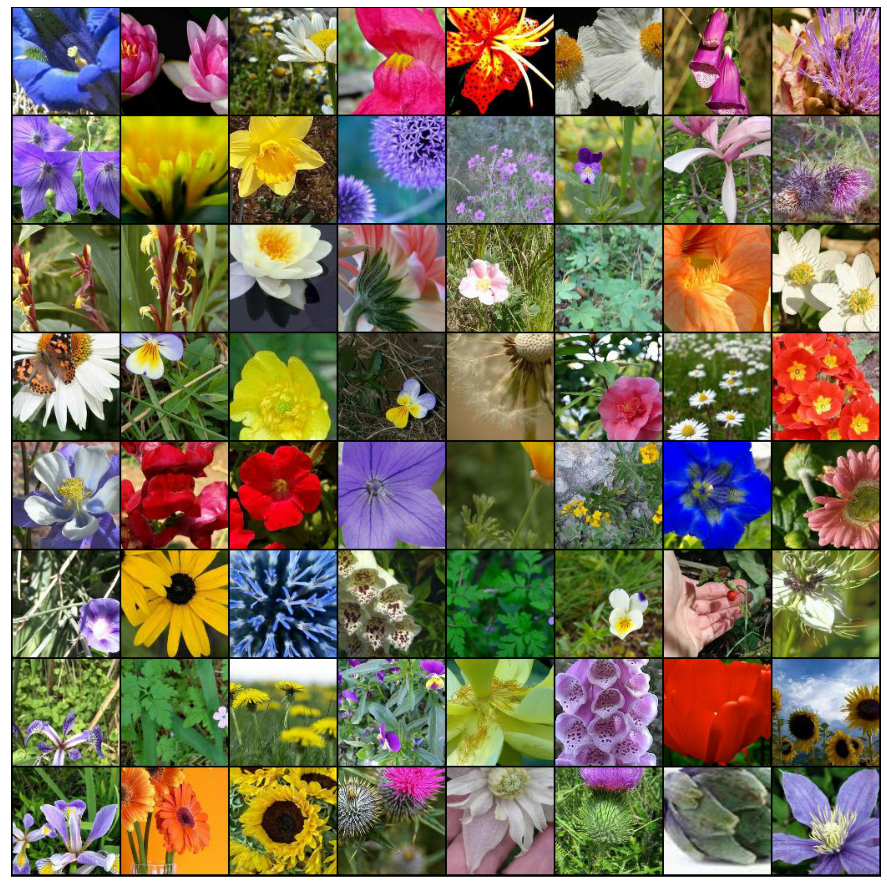

In [ ]:
show_batch(train_dl)

In [ ]:
def accuracy(out, labels):
    _, preds = torch.max(out, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {"val_loss": loss.detach(), "val_acc": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
            print("Epoch: [{}], last_lr: {:.6f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch, result["lrs"][-1], result["train_loss"], result["val_loss"], result["val_acc"]))

In [ ]:
resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class flowers_resnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = models.resnet34(pretrained=True)
        number_features = self.network.fc.in_features
        self.network.fc = nn.Linear(number_features, 104)
        
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
            
    def unfreeze(self):
        for param in self.network.parameters():
            param.require_grad = True

In [ ]:
def select_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for x in self.dl:
            yield to_device(x, self.device)
            
    def __len__(self):
        return len(self.dl)

In [ ]:
device = select_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [ ]:
@torch.no_grad()
def evaluate(model, val_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_dl]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group["lr"]
    
def fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, weight_decay=0, 
                  grad_clip=None, opt_func=torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                               steps_per_epoch=len(train_dl))
    
    for epoch in range(epochs):
        model.train()
        train_loss = []
        lrs = []
        for batch in tqdm(train_dl):
            loss = model.training_step(batch)
            train_loss.append(loss)
            loss.backward()
            
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            lrs.append(get_lr(optimizer))
            sched.step()
            
        result = evaluate(model, val_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(flowers_resnet(), device)

In [ ]:
device

device(type='cuda')

In [ ]:
history = [evaluate(model, val_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.011853448115289211, 'val_loss': 4.641714572906494}]

In [ ]:
model.freeze()

In [ ]:
epochs = 7
max_lr = 10e-5
grad_clip = 0.1
weight_decay= 1e-5
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,
                         grad_clip=grad_clip, weight_decay=weight_decay, 
                         opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Epoch: [0], last_lr: 0.000048, train_loss: 4.5351, val_loss: 4.3729, val_acc: 0.3233



Epoch: [1], last_lr: 0.000099, train_loss: 4.1309, val_loss: 4.0440, val_acc: 0.5803



Epoch: [2], last_lr: 0.000092, train_loss: 3.9050, val_loss: 3.9145, val_acc: 0.6991



Epoch: [3], last_lr: 0.000067, train_loss: 3.8231, val_loss: 3.8549, val_acc: 0.7645



Epoch: [4], last_lr: 0.000036, train_loss: 3.7832, val_loss: 3.8306, val_acc: 0.7877



Epoch: [5], last_lr: 0.000010, train_loss: 3.7640, val_loss: 3.8208, val_acc: 0.8036



Epoch: [6], last_lr: 0.000000, train_loss: 3.7583, val_loss: 3.8193, val_acc: 0.8082
CPU times: user 1min 54s, sys: 1min 30s, total: 3min 24s
Wall time: 4min


In [ ]:
model.unfreeze()

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,
                         grad_clip=grad_clip, weight_decay=weight_decay, 
                         opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Epoch: [0], last_lr: 0.000048, train_loss: 3.7545, val_loss: 3.8145, val_acc: 0.8138



Epoch: [1], last_lr: 0.000099, train_loss: 3.7454, val_loss: 3.7974, val_acc: 0.8039



Epoch: [2], last_lr: 0.000092, train_loss: 3.7311, val_loss: 3.7797, val_acc: 0.8367



Epoch: [3], last_lr: 0.000067, train_loss: 3.7146, val_loss: 3.7658, val_acc: 0.8489



Epoch: [4], last_lr: 0.000036, train_loss: 3.7028, val_loss: 3.7585, val_acc: 0.8607



Epoch: [5], last_lr: 0.000010, train_loss: 3.6946, val_loss: 3.7549, val_acc: 0.8704



Epoch: [6], last_lr: 0.000000, train_loss: 3.6920, val_loss: 3.7532, val_acc: 0.8726
CPU times: user 1min 56s, sys: 1min 31s, total: 3min 27s
Wall time: 4min 2s


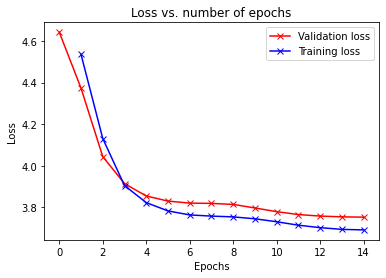

In [ ]:
def plot_loss(histroy):
    val_loss = [x["val_loss"] for x in history]
    train_loss = [x.get("train_loss") for x in history]
    plt.plot(val_loss, "-rx")
    plt.plot(train_loss, "-bx")
    plt.title("Loss vs. number of epochs")
    plt.legend(["Validation loss", "Training loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

plot_loss(history)


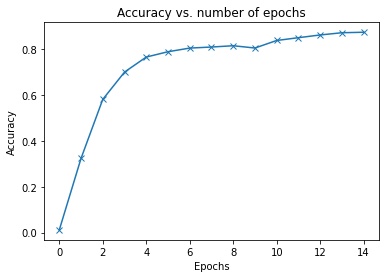

In [ ]:
def plot_accuracy(history):
    accuracy = [x["val_acc"] for x in history]
    plt.plot(accuracy, "-x")
    plt.title("Accuracy vs. number of epochs")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    
plot_accuracy(history)

In [ ]:
def prediction(images, model):
    xb = to_device(images.unsqueeze(0), device)
    out = model(xb)
    _, preds = torch.max(out, dim=1)
    return train_ds.classes[preds[0].item()]

Label:  moon orchid Prediction: moon orchid


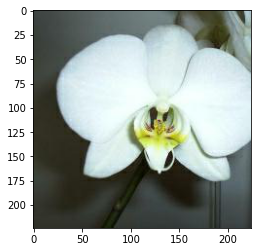

In [ ]:
images, labels = test_ds[100]
plt.imshow(images.permute(1,2,0))
print("Label: ", labels, "Prediction:", prediction(images, model))

Label:  anthurium Prediction: anthurium


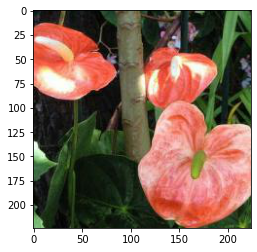

In [ ]:
images, labels = test_ds[200]
plt.imshow(images.permute(1,2,0))
print("Label: ", labels, "Prediction:", prediction(images, model))